Crear un modelo de aprendizaje automático (ML) para un conjunto de datos de Alzheimer puede ser un proceso desafiante pero gratificante. Aquí te presento una introducción general a los pasos que podrías seguir:

1. **Comprensión del problema**: El primer paso es entender el problema que estás tratando de resolver. En nuestro, a paritir de un conjunto de datos de Alzheimer, nos interesa  predecir el diagnóstico de un paciente basándonos en una serie de características, como los resultados de pruebas cognitivas, factores genéticos , demográficos y edad

2. **Análisis exploratorio de datos**: Este paso implica explorar y entender tus datos. . Esto implico la creación de gráficos, el cálculo de estadísticas descriptivas y la comprobación de la existencia de valores atípicos o faltantes.

3. **Preprocesamiento de datos**: en esta etapa en funcion del análisis exploratorio, tal vez se necesitaria limpiar tus datos, impliccara correcion de valores faltantes, y la transformación de variables para mejorar su utilidad para el modelado.

4. **Selección y transformación de características**: Aqui podria  muchas características que pueden no ser todas útiles o relevantes para predecir el diagnóstico del Alzheimer. También podrías querer transformar tus características, por ejemplo, normalizando o estandarizando las variables numéricas, o codificando las variables categóricas.

5. **Construcción del modelo**: Una vez que los datos estén preparados, puedes construiremos el modelo ML. Hay muchos algoritmos diferentes que podrías considerar, desde regresión logística y árboles de decisión hasta redes neuronales y máquinas de vectores soporte. La elección del algoritmo dependerá del tipo y la naturaleza de tus datos, así como del problema específico que estés tratando de resolver.

6. **Entrenamiento y evaluación del modelo**: Después de construir el modelo, se entrenara en los datos y luego evaluar su rendimiento. Esto generalmente implica dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba, entrenar el modelo en el conjunto de entrenamiento y luego evaluar su rendimiento en el conjunto de prueba.

7. **Ajuste del modelo**: Es posible que se necesite ajustar el modelo para mejorar su rendimiento. Esto podría implicar ajustar los parámetros del algoritmo que estás utilizando, probar diferentes algoritmos, o volver a los pasos anteriores para realizar más preprocesamiento o selección de características.

8. **Interpretación del modelo**: Finalmente, se debera realizar una interpretar del modelo para entender qué características son las más importantes para predecir el diagnóstico del Alzheimer, y cómo estas características se relacionan con el diagnóstico.



In [23]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datos_alzheimer = pd.read_csv('../../datos/procesados/datos_codificados.csv')


In [24]:
# Eliminar columnas innecesarias

df = datos_alzheimer.drop('Unnamed: 0', axis = 1)
df = df.drop('DX_SUB', axis = 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DX                628 non-null    int64  
 1   AGE               628 non-null    float64
 2   PTGENDER          628 non-null    int64  
 3   PTEDUCAT          628 non-null    int64  
 4   PTETHCAT          628 non-null    int64  
 5   PTRACCAT          628 non-null    int64  
 6   APOE4             628 non-null    int64  
 7   MMSE              628 non-null    int64  
 8   imputed_genotype  628 non-null    int64  
 9   APOE Genotype     628 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 49.2 KB


In [26]:
import pandas as pd


# Para ver las primeras 5 filas del dataframe
print(df.head())



   DX   AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  APOE4  MMSE  \
0   1  89.6         0        16         1         2      0    30   
1   2  89.3         1        13         1         2      0    26   
2   0  89.1         0        20         1         2      0    26   
3   2  88.8         1        11         1         2      0    26   
4   1  88.6         0        20         1         2      0    30   

   imputed_genotype  APOE Genotype  
0                 1            3.4  
1                 1            3.3  
2                 1            3.3  
3                 1            3.3  
4                 0            3.4  


In [27]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        DX       AGE  PTGENDER  PTEDUCAT  PTETHCAT  PTRACCAT  \
DX                1.000000 -0.013945  0.123915  0.096321 -0.070745 -0.007961   
AGE              -0.013945  1.000000  0.057048 -0.015779  0.075848  0.004580   
PTGENDER          0.123915  0.057048  1.000000  0.194800  0.021930  0.055331   
PTEDUCAT          0.096321 -0.015779  0.194800  1.000000  0.065141  0.000191   
PTETHCAT         -0.070745  0.075848  0.021930  0.065141  1.000000 -0.015539   
PTRACCAT         -0.007961  0.004580  0.055331  0.000191 -0.015539  1.000000   
APOE4            -0.062009 -0.171706  0.009748 -0.051488  0.070488  0.040585   
MMSE              0.384486 -0.016813  0.021397  0.232190  0.021667  0.037920   
imputed_genotype -0.023787  0.071339  0.093528  0.038485  0.102219  0.437303   
APOE Genotype     0.029522 -0.069266 -0.029966 -0.009129  0.028478 -0.023209   

                     APOE4      MMSE  imputed_genotype  APOE Genotype  
DX               -0.062009  0.384486         -0

<Axes: >

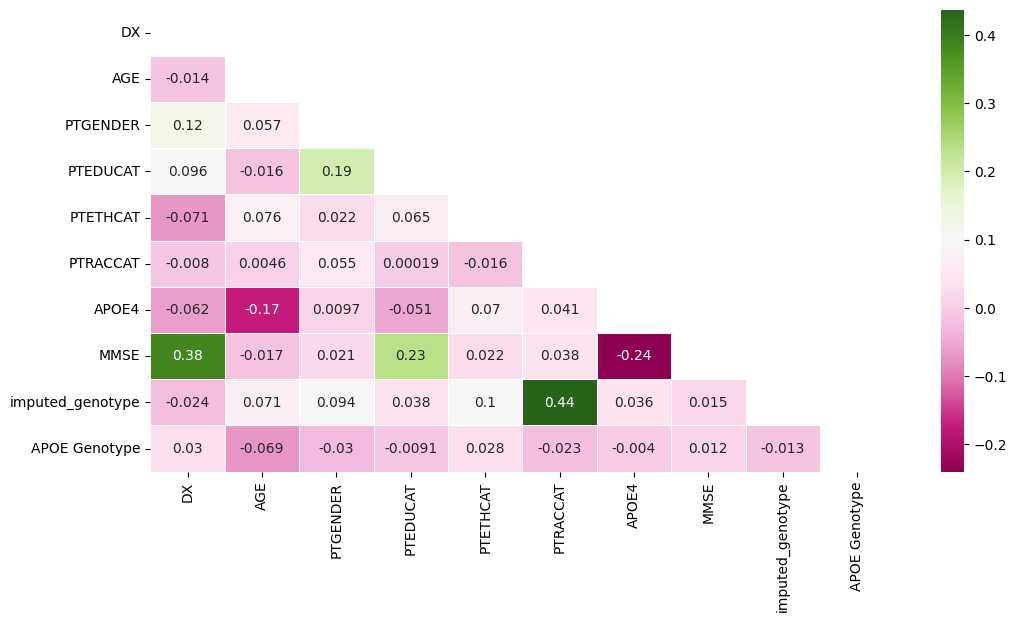

In [28]:
# miremos los datos

plt.figure(figsize=(12,6))
corr = df.corr()

# numpy zeros_like: return an array of zeros with the same shape and type as a given array.
mask = np.zeros_like(corr, dtype=bool)

# y esto es para obtener solamente un triangulo de la matriz simétrica
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), linewidths=.5, annot = True, mask = mask, cmap = 'PiYG')

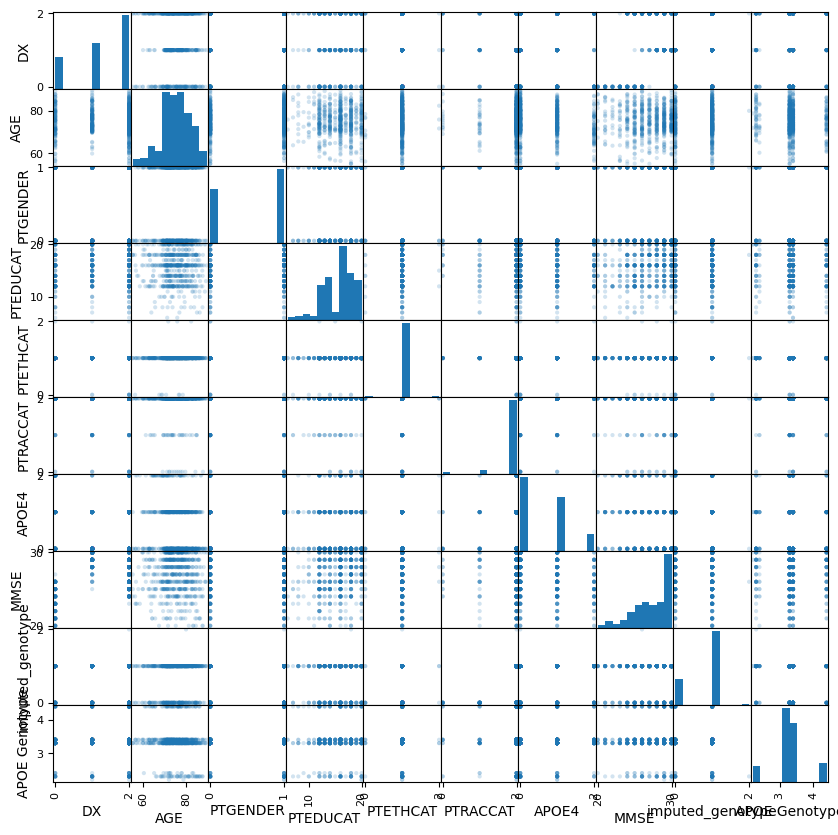

In [29]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#
scatter_matrix(df, alpha=0.2, figsize=(10, 10))

plt.show()


Preprocesamiento de datos:

“Carguemos nuestras variables (features: X) y nuestro valor target (y) que queremos predecir, que es el Diagnostico de Alzheimer”.

In [30]:

from sklearn.model_selection import train_test_split
# Dividir los datos en conjunto de entrenamiento y prueba

features = df.drop('DX', axis = 1).values
target = df['DX'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=27)

Construcción del modelo



In [31]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo AdaBoost
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 0.6428571428571429


Primera Conclusión=  Se ha obtenido una precisión del 64,24%. Esto significa que tu modelo predice correctamente el resultado aproximadamente la mitad del tiempo.

Mejorando el Modelo

#### Estimando los mejores Hiperparametros 

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Experimenta con diferentes valores para n_estimators y learning_rate
n_estimators = 10 # Puedes aumentar este valor para un modelo más complejo
learning_rate = 1.1 # Puedes ajustar la tasa de aprendizaje

model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 0.6904761904761905


####Reseleccionemos las caracteristicas  con el objetivo de predecir el diagnóstico (DX) utilizando solo l 'MMSE', 'AGE', 'PTEDUCAT' y 'APOE4':



In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Selecciona las características de interés
features = ['MMSE', 'AGE', 'PTEDUCAT', 'APOE4']
X = df[features]
y = df['DX']  

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo AdaBoost
model = AdaBoostClassifier(n_estimators=2750, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo AdaBoost es: {accuracy}')


La precisión del modelo AdaBoost es: 0.7063492063492064


In [104]:
from sklearn.metrics import confusion_matrix

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Crea la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(confusion)


Matriz de Confusión:
[[24  0  3]
 [ 1 31 13]
 [13  7 34]]


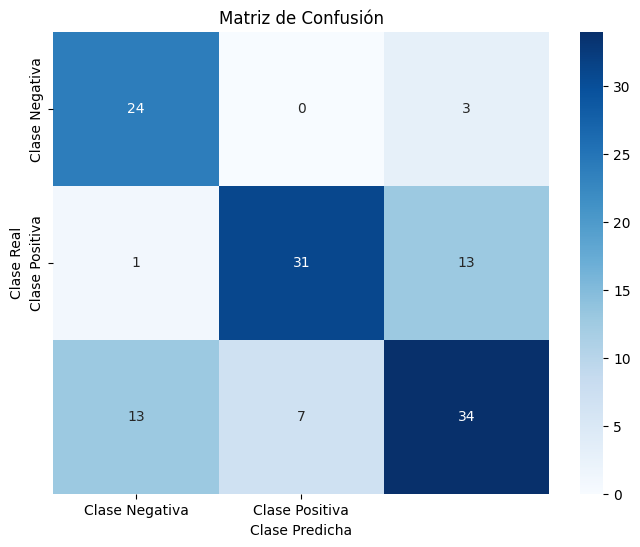

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Crea la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases
class_names = ['Clase Negativa', 'Clase Positiva']

# Crea un mapa de calor (heatmap) de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()


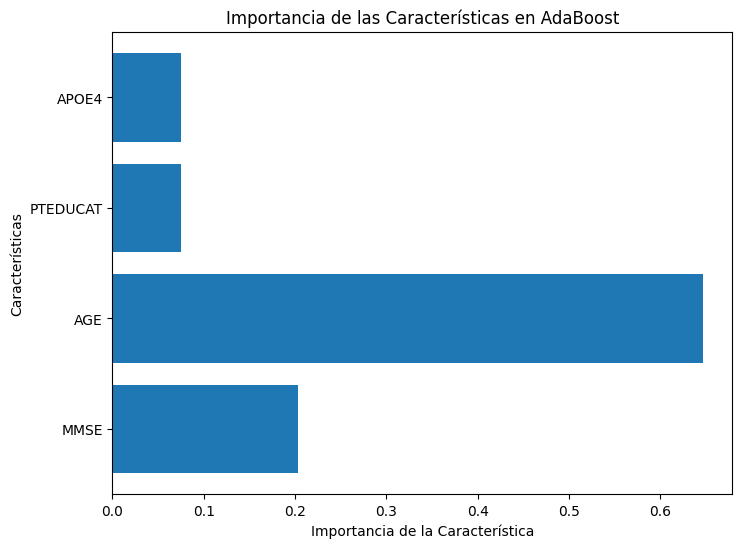

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Obtén la importancia de las características desde el modelo AdaBoost
feature_importance = model.feature_importances_

# Obtén los nombres de las características
feature_names = ['MMSE', 'AGE', 'PTEDUCAT', 'APOE4']

# Crea un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de las Características en AdaBoost')
plt.show()
